# First version of AER U-Net (following the paper)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

models_data = {
    "Unet": {
        "train_loss": [0.5190, 0.4719, 0.4547, 0.4392, 0.4370, 0.4253, 0.4243, 0.4138, 0.4137, 0.4026],
        "val_loss": [0.5158, 0.4459, 0.4337, 0.4369, 0.3985, 0.4216, 0.3992, 0.3980, 0.4262, 0.3908],
        "train_acc": [0.7693, 0.7987, 0.8081, 0.8160, 0.8155, 0.8243, 0.8226, 0.8301, 0.8293, 0.8359],
        "val_acc": [0.7790, 0.8060, 0.8126, 0.8115, 0.8341, 0.8228, 0.8316, 0.8314, 0.8208, 0.8372],
        "final_scores": {
            "Precision": 0.8425,
            "Recall": 0.6434,
            "F1": 0.7296,
            "IoU": 0.5743
        }
    },
    "R_UNET": {
        "train_loss": [0.5332, 0.4952, 0.4752, 0.4583, 0.4539, 0.4416, 0.4404, 0.4293, 0.4203, 0.4218],
        "val_loss": [0.5450, 0.4940, 0.5190, 0.4702, 0.4434, 0.4487, 0.4328, 0.4205, 0.4474, 0.4179],
        "train_acc": [0.7499, 0.7761, 0.7916, 0.8030, 0.8072, 0.8135, 0.8148, 0.8195, 0.8259, 0.8237],
        "val_acc": [0.7699, 0.7544, 0.7607, 0.8006, 0.8115, 0.8087, 0.8167, 0.8231, 0.8123, 0.8237],
        "final_scores": {
            "Precision": 0.7782,
            "Recall": 0.6764,
            "F1": 0.7237,
            "IoU": 0.5670
        }
    },
    "AE UNet": {
        "train_loss": [0.5147, 0.4686, 0.4465, 0.4413, None, None, None, None, None, 0.4041],
        "val_loss": [0.4471, 0.4356, 0.4426, 0.4104, None, None, None, None, None, 0.3963],
        "train_acc": [0.7680, 0.7969, 0.8123, 0.8135, None, None, None, None, None, 0.8356],
        "val_acc": [0.8063, 0.8140, 0.8078, 0.8256, None, None, None, None, None, 0.8314],
        "final_scores": {
            "Precision": 0.7606,
            "Recall": 0.7387,
            "F1": 0.7495,
            "IoU": 0.5994
        }
    },
    "AER UNet": {
        "train_loss": [0.5356, 0.4936, 0.4736, 0.4568, 0.4534, 0.4413, 0.4376, 0.4333, 0.4232, 0.4194],
        "val_loss": [0.5067, 0.4531, 0.4263, 0.4371, 0.4288, 0.4464, 0.4195, 0.4211, 0.4207, 0.4148],
        "train_acc": [0.7477, 0.7801, 0.7963, 0.8046, 0.8056, 0.8140, 0.8153, 0.8204, 0.8237, 0.8255],
        "val_acc": [0.7646, 0.8009, 0.8202, 0.8107, 0.8214, 0.8107, 0.8215, 0.8232, 0.8200, 0.8237],
        "final_scores": {
            "Precision": 0.7725,
            "Recall": 0.6855,
            "F1": 0.7264,
            "IoU": 0.5704
        }
    }
}

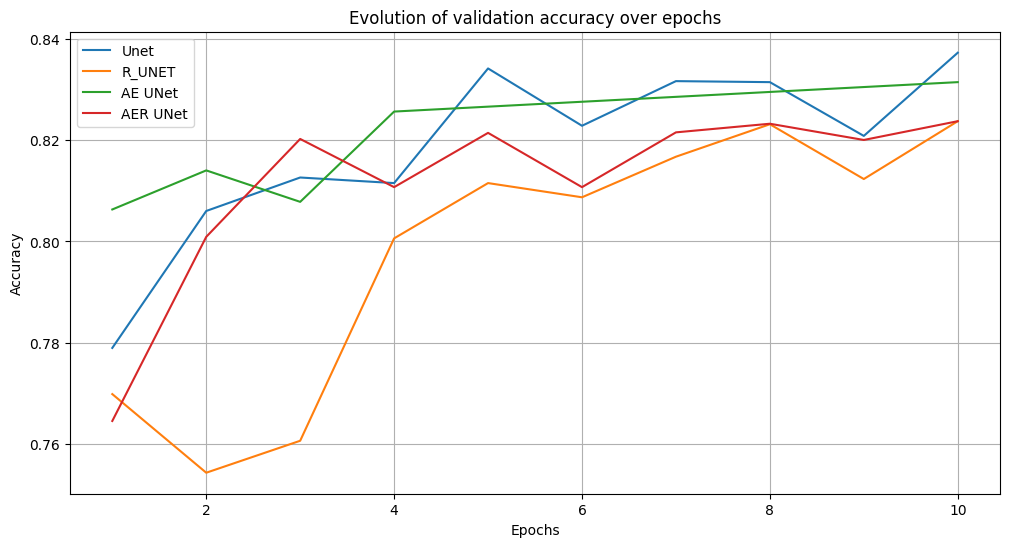

In [2]:
epochs = list(range(1, 11))

# Print validation accuracy
plt.figure(figsize=(12, 6))
for name, data in models_data.items():
    val = data['val_acc']
    if None in val:
        valid_epochs = [e for e, v in zip(epochs, val) if v is not None]
        val_cleaned = [v for v in val if v is not None]
        plt.plot(valid_epochs, val_cleaned, label=f'{name}')
    else:
        plt.plot(epochs, val, label=f'{name}')
plt.title("Evolution of validation accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("validation_accuracy_evolution_AER.png")
plt.show()

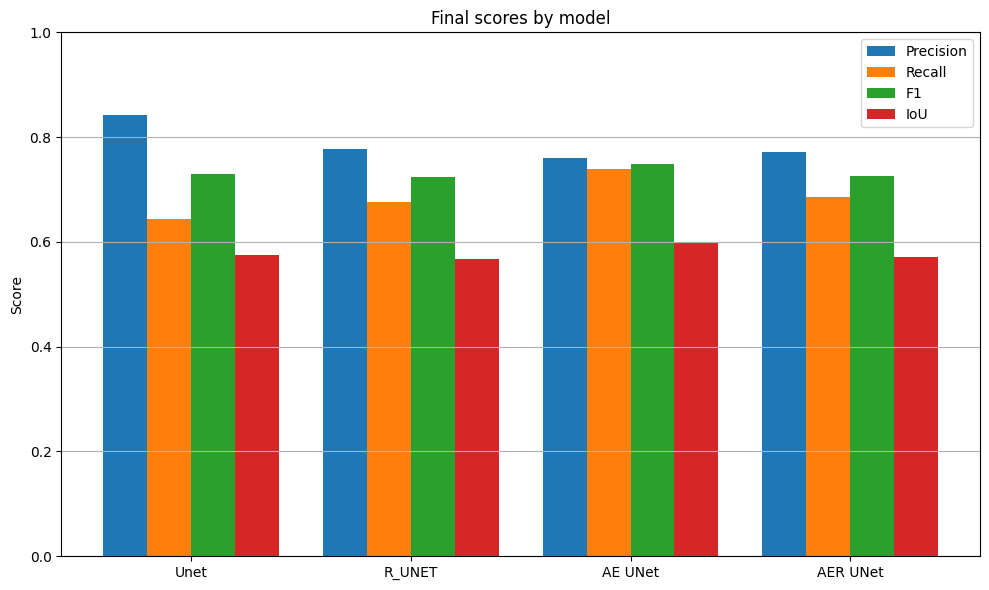

In [3]:
# Print precision, recall etc...
score_types = ['Precision', 'Recall', 'F1', 'IoU']
n_models = len(models_data)
x = np.arange(n_models)
bar_width = 0.2

plt.figure(figsize=(10, 6))
for i, score in enumerate(score_types):
    values = [data['final_scores'][score] for data in models_data.values()]
    plt.bar(x + i * bar_width, values, width=bar_width, label=score)

plt.xticks(x + bar_width * 1.5, models_data.keys())
plt.ylim(0, 1)
plt.title("Final scores by model")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("metrics_AER.png")
plt.show()

| Model     | Accuracy | Precision | Recall | F1 Score | IoU   |
|------------|----------|-----------|--------|----------|-------|
| Unet       | **0.8372**   | **0.8425**    | 0.6434 | 0.7296   | 0.5743 |
| R_UNET     | 0.8237   | 0.7782    | 0.6764 | 0.7237   | 0.5670 |
| AE UNet    | 0.8314   | 0.7606    | **0.7387** | **0.7495**   | **0.5994** |
| AER UNet   | 0.8237   | 0.7725    | 0.6855 | 0.7264   | 0.5704 |


**Interpretation**

The F1-score and IoU score for the AER U-Net model (respectively 0.7264 and 0.5704) are significantly below the values reported in the original paper (F1 ≈ 0.946, IoU ≈ 0.947). This suggests that the model has not fully replicated the performance claimed in the literature.

Interestingly, the AE UNet showed the best balance between precision and recall, with an F1-score of 0.7495 and an IoU of 0.5994. This may indicate better generalization despite a simpler structure.

We identified a factor that could explain the difference between our results, and the ones from the original paper : the limited training duration. Indeed, du to computational limits, we could not train our models with more than 10 epochs, while the article suggests 50 epochs. We suppose that the short number of epochs is not sufficient for convergence

Recall values are generally lower across models (e.g., 0.6434 for Unet, 0.6855 for AER UNet), indicating a tendency to miss positive water body regions. On the other hand, precision is relatively high, suggesting that when the model predicts water, it is usually correct—but not exhaustive. This highlights a common issue in imbalanced segmentation: under-detection of true positives.

# Second version of U-Net

In [4]:
import matplotlib.pyplot as plt
import numpy as np

models_data = {
    "Unet": {
        "train_loss": [0.5190, 0.4719, 0.4547, 0.4392, 0.4370, 0.4253, 0.4243, 0.4138, 0.4137, 0.4026],
        "val_loss": [0.5158, 0.4459, 0.4337, 0.4369, 0.3985, 0.4216, 0.3992, 0.3980, 0.4262, 0.3908],
        "train_acc": [0.7693, 0.7987, 0.8081, 0.8160, 0.8155, 0.8243, 0.8226, 0.8301, 0.8293, 0.8359],
        "val_acc": [0.7790, 0.8060, 0.8126, 0.8115, 0.8341, 0.8228, 0.8316, 0.8314, 0.8208, 0.8372],
        "final_scores": {
            "Precision": 0.8425,
            "Recall": 0.6434,
            "F1": 0.7296,
            "IoU": 0.5743
        }
    },
    "R U-Net": {
        "train_loss": [0.5122, 0.4588, 0.4415, 0.4288, 0.4200, 0.4109, 0.4076, 0.4005, 0.3960, 0.3951],
        "val_loss": [0.4783, 0.4406, 0.4194, 0.4271, 0.4635, 0.4179, 0.4004, 0.4405, 0.4776, 0.4639],
        "train_acc": [0.7657, 0.8017, 0.8133, 0.8200, 0.8244, 0.8310, 0.8307, 0.8353, 0.8383, 0.8380],
        "val_acc": [0.7796, 0.8085, 0.8200, 0.8184, 0.8100, 0.8284, 0.8356, 0.8169, 0.7875, 0.8072],
        "final_scores": {
            "Precision": 0.7487,
            "Recall": 0.6552,
            "F1": 0.6988,
            "IoU": 0.5371
        }
    },    
    "SE U-Net": {
        "train_loss": [0.5849, 0.4974, 0.4559, 0.4309, 0.4183, 0.4101, 0.3960, 0.3959, 0.3835, 0.3830],
        "val_loss": [0.5408, 0.4429, 0.4380, 0.4013, 0.3766, 0.3991, 0.3669, 0.3640, 0.3570, 0.3578],
        "train_acc": [0.7190, 0.7900, 0.8090, 0.8213, 0.8232, 0.8300, 0.8366, 0.8369, 0.8431, 0.8446],
        "val_acc": [0.7557, 0.8242, 0.8178, 0.8356, 0.8498, 0.8315, 0.8482, 0.8513, 0.8529, 0.8532],
        "final_scores": {
            "Precision": 0.8207,
            "Recall": 0.7293,
            "F1": 0.7723,
            "IoU": 0.6290
        }
    },
    "SE-R-Unet": {
        "train_loss": [0.4998, 0.4366, 0.4107, 0.3972, 0.3916, 0.3783, 0.3818, 0.3665, 0.3630, 0.3512],
        "val_loss": [0.4216, 0.4095, 0.4511, 0.3749, 0.3584, 0.3614, 0.3627, 0.3557, 0.3486, 0.3295],
        "train_acc": [0.7773, 0.8156, 0.8278, 0.8350, 0.8391, 0.8459, 0.8442, 0.8513, 0.8533, 0.8584],
        "val_acc": [0.8182, 0.8274, 0.8077, 0.8412, 0.8527, 0.8512, 0.8512, 0.8531, 0.8587, 0.8688],
        "final_scores": {
            "Precision": 0.8593,
            "Recall": 0.7365,
            "F1": 0.7932,
            "IoU": 0.6572
        }
    }
}

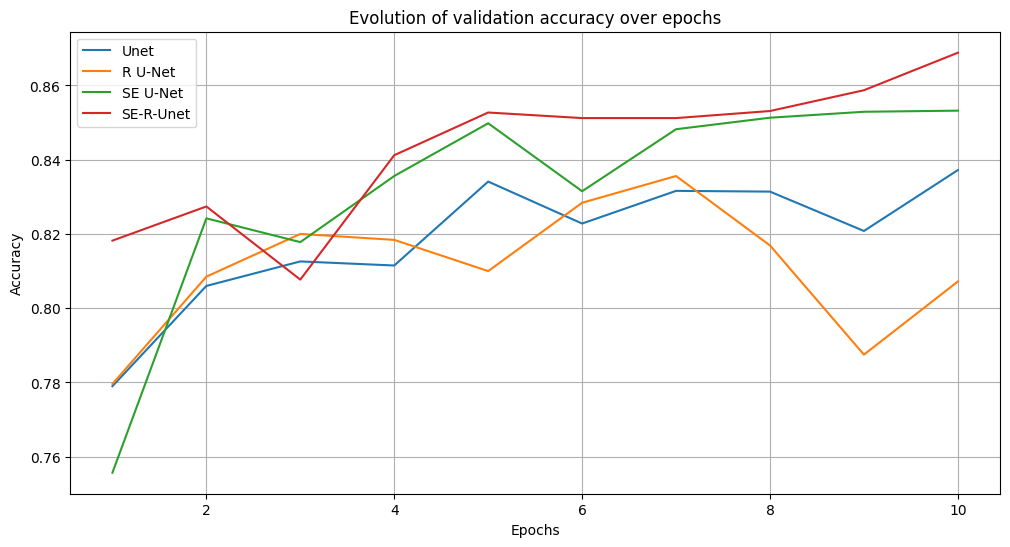

In [5]:
epochs = list(range(1, 11))

# Print validation accuracy
plt.figure(figsize=(12, 6))
for name, data in models_data.items():
    val = data['val_acc']
    if None in val:
        valid_epochs = [e for e, v in zip(epochs, val) if v is not None]
        val_cleaned = [v for v in val if v is not None]
        plt.plot(valid_epochs, val_cleaned, label=f'{name}')
    else:
        plt.plot(epochs, val, label=f'{name}')
plt.title("Evolution of validation accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("validation_accuracy_evolution_SER.png")
plt.show()

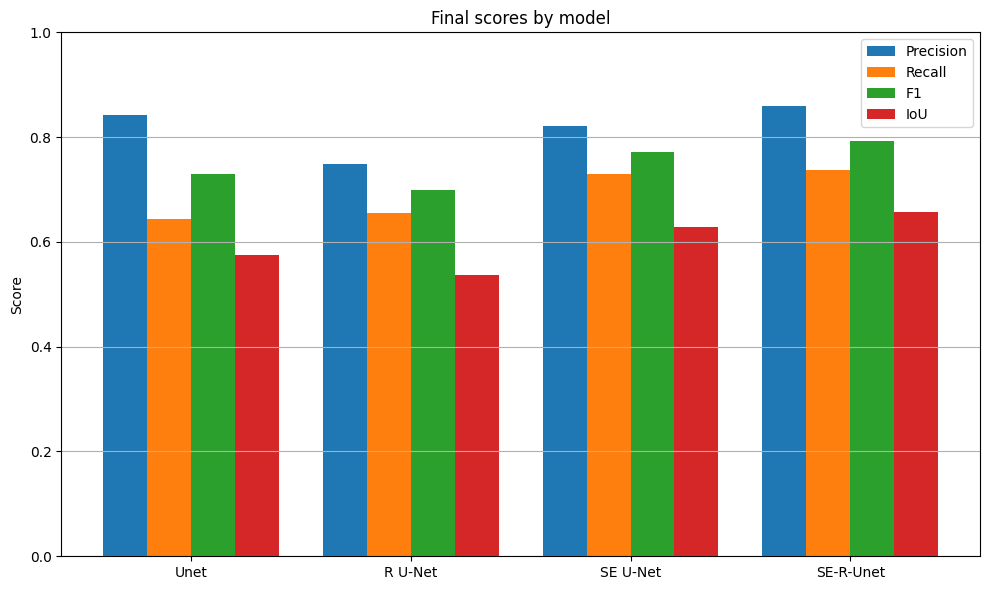

In [6]:
# Print precision, recall etc...
score_types = ['Precision', 'Recall', 'F1', 'IoU']
n_models = len(models_data)
x = np.arange(n_models)
bar_width = 0.2

plt.figure(figsize=(10, 6))
for i, score in enumerate(score_types):
    values = [data['final_scores'][score] for data in models_data.values()]
    plt.bar(x + i * bar_width, values, width=bar_width, label=score)

plt.xticks(x + bar_width * 1.5, models_data.keys())
plt.ylim(0, 1)
plt.title("Final scores by model")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("metrics_SER.png")
plt.show()

| Model     | Accuracy | Precision | Recall | F1 Score | IoU   |
|-----------|----------|-----------|--------|----------|-------|
| Unet      | 0.8532   | 0.8207    | 0.7293 | 0.7723   | 0.6290 |
| R U-Net   | 0.8072   | 0.7487    | 0.6552 | 0.6988   | 0.5371 |
| SE U-Net  | 0.8532   | 0.8207    | 0.7293 | 0.7723   | 0.6290 |
| SE-R-Unet | **0.8688**   | **0.8593**    | **0.7365** | **0.7932**   | **0.6572** |



The results of the second models indicate an improvement in segmentation performance. Notably, the SE-R-UNet model achieved the highest validation metrics, with an accuracy of 0.8688, precision of 0.8593, recall of 0.7365, F1 score of 0.7932, and an IoU of 0.6572. It finally shows that the addition of residual and attention blocks helps increasing performance for this task. However, recall values remain lower than precision across all models, suggesting that the models tend to under-detect positive water body regions. This imbalance likely stems from the inherent class imbalance in the dataset and limited training epochs. The high precision indicates reliable positive predictions when the model detects water, but further work is needed to enhance recall, potentially through extended training or loss functions better suited to imbalanced segmentation tasks. Overall, the results demonstrate promising advancements thanks to residuals and attention blocks directly inside the convolutionnal blocks.